# This is a netflix dataset visualization

The entire dataset can be found here:
https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
credits=pd.read_csv("./credits.csv")
titles=pd.read_csv("./titles.csv")

## credits have the following columns: person_id,id,name,character,role

In [6]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [7]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## titles have the following columns: id,title,description,type,release_year,age_certification,runtime,genres and so on

In [8]:
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

### We will first visualize credits data

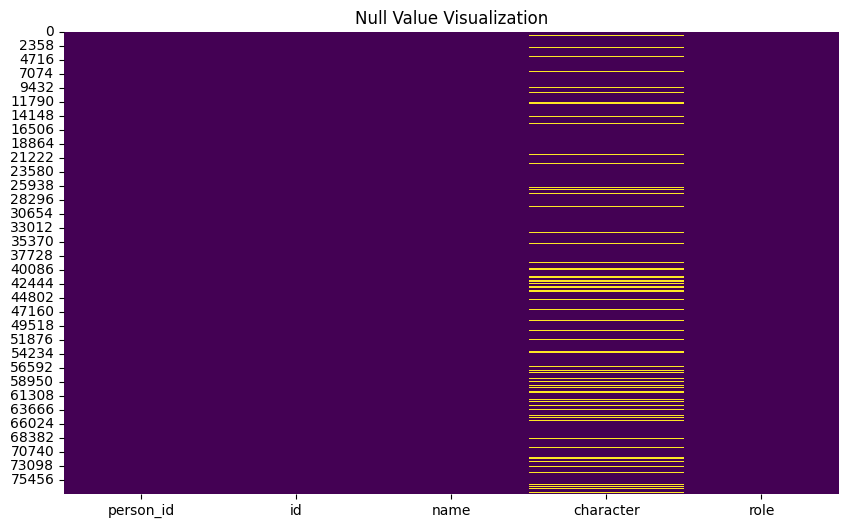

In [9]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn to create a heatmap of null values
sns.heatmap(credits.isnull(), cbar=False, cmap='viridis')

plt.title("Null Value Visualization")
plt.show()

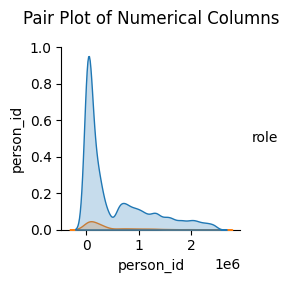

In [10]:
# Create a pair plot for numerical columns
import warnings

# Disable the tight_layout warning
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(credits, hue='role')
plt.title("Pair Plot of Numerical Columns")
plt.show()

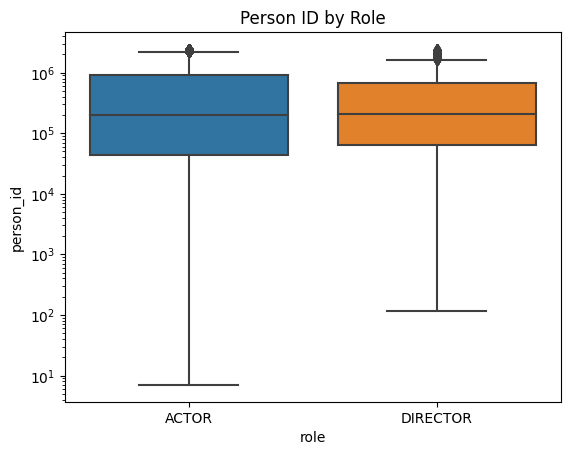

In [11]:
# Create a box plot of person_id by role
sns.boxplot(data=credits, x='role', y='person_id')
plt.title("Person ID by Role")
plt.yscale("log")
plt.show()

### This plot shows the distribution of roles(Actors/Directors)

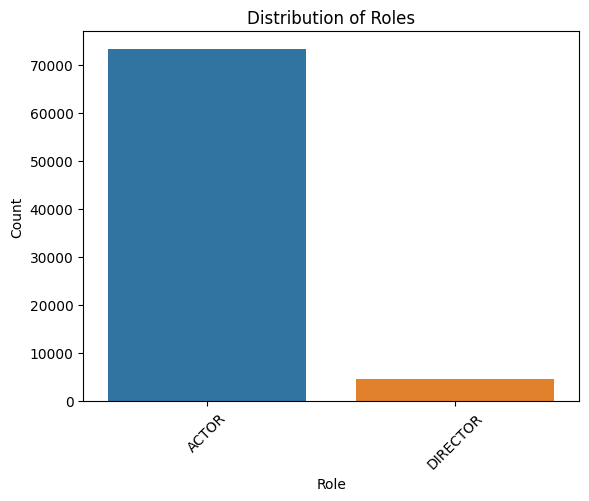

In [12]:
# Count plot for the 'role' column
sns.countplot(data=credits, x='role')
plt.title("Distribution of Roles")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### We get to know the top actors and directors based on their count of movies

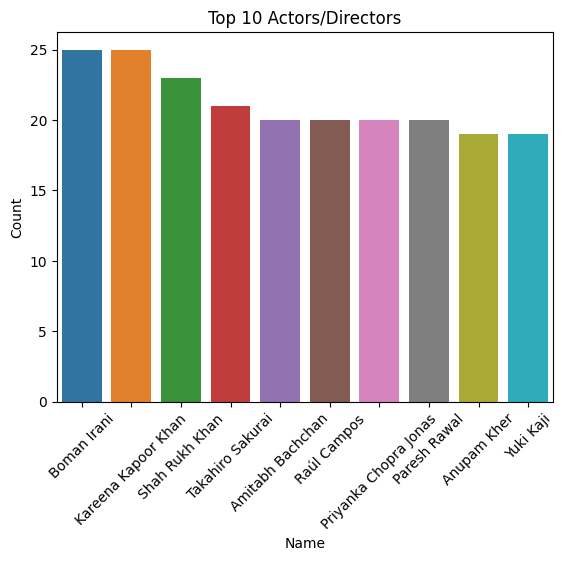

In [13]:
top_n = 10  # Change this value to the desired number of top names
top_names = credits['name'].value_counts()[:top_n]
sns.barplot(x=top_names.index, y=top_names.values)
plt.title(f"Top {top_n} Actors/Directors")
plt.xlabel("Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Now, we visualize the titles dataset

In [14]:
null_values = titles.isnull().sum()
print(null_values)

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64


## Used a heatmap to show a heatmap of null values

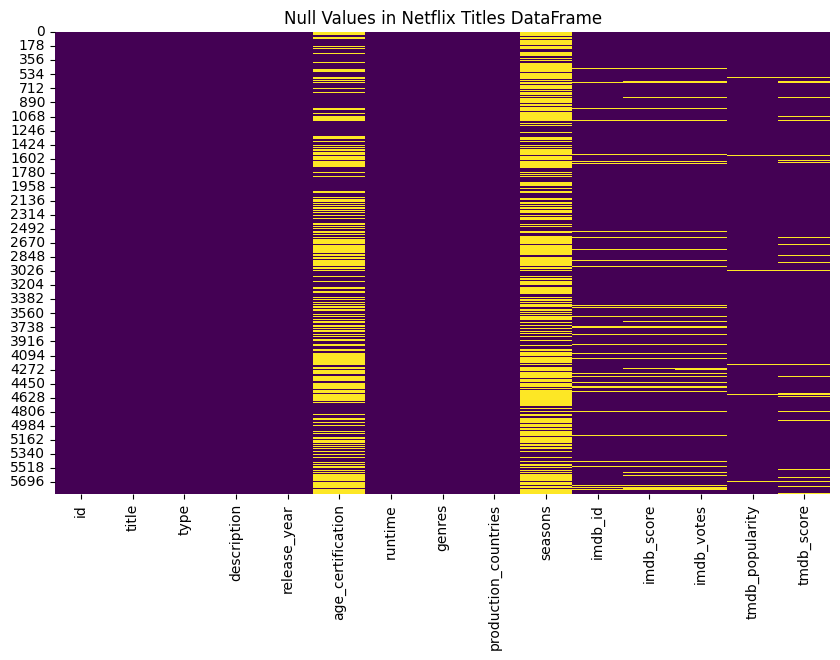

In [15]:
# Visualize Null Values
plt.figure(figsize=(10, 6))
sns.heatmap(titles.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Netflix Titles DataFrame')
plt.show()

### Count of null values in each column

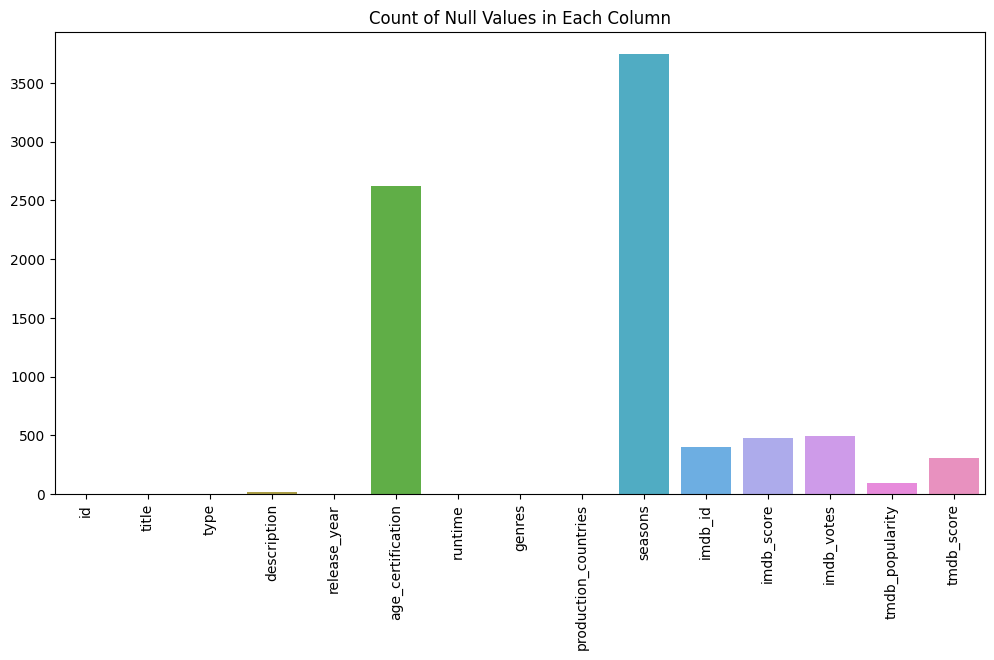

In [16]:
# You can also use bar plots to visualize the count of null values in each column:
plt.figure(figsize=(12, 6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xticks(rotation=90)
plt.title('Count of Null Values in Each Column')
plt.show()

### Distribution of the type of content

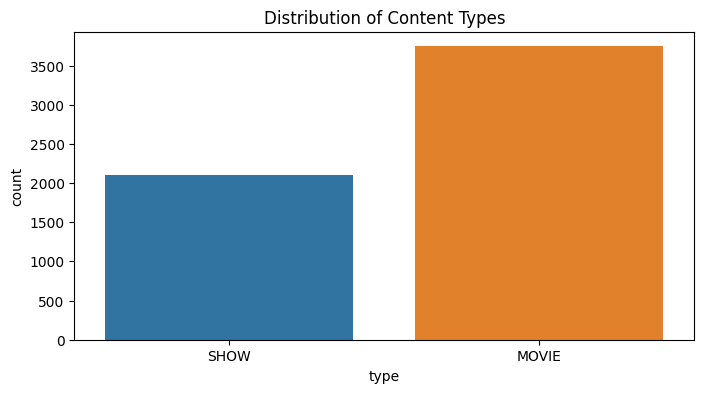

In [17]:
# - Countplot for 'type' column
plt.figure(figsize=(8, 4))
sns.countplot(data=titles, x='type')
plt.title('Distribution of Content Types')
plt.show()
# Now we know how many tv shows/movies are there in the dataset 

### Distribution of movies/tv-shows over the years

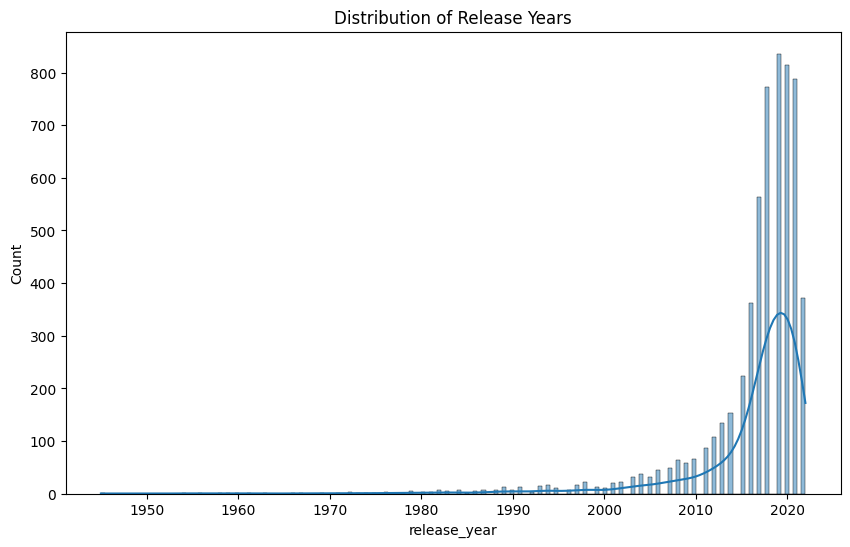

In [18]:
# - Histogram for 'release_year'
plt.figure(figsize=(10, 6))
sns.histplot(data=titles, x='release_year', kde=True)
plt.title('Distribution of Release Years')
plt.show()

### Distribution of imdb scores

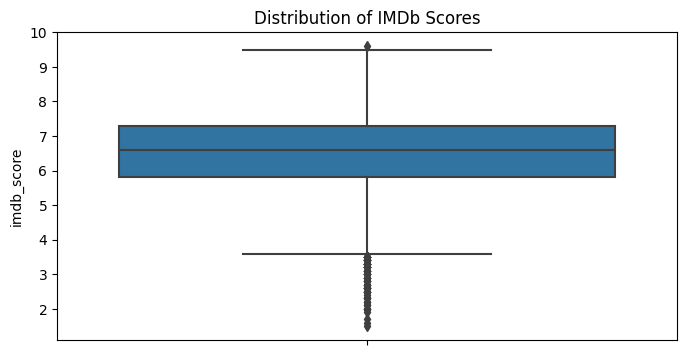

In [19]:
# - Boxplot for 'imdb_score'
plt.figure(figsize=(8, 4))
sns.boxplot(data=titles, y='imdb_score')
plt.title('Distribution of IMDb Scores')
plt.show()

### Top 20 highest imdb-rated tv shows and movies

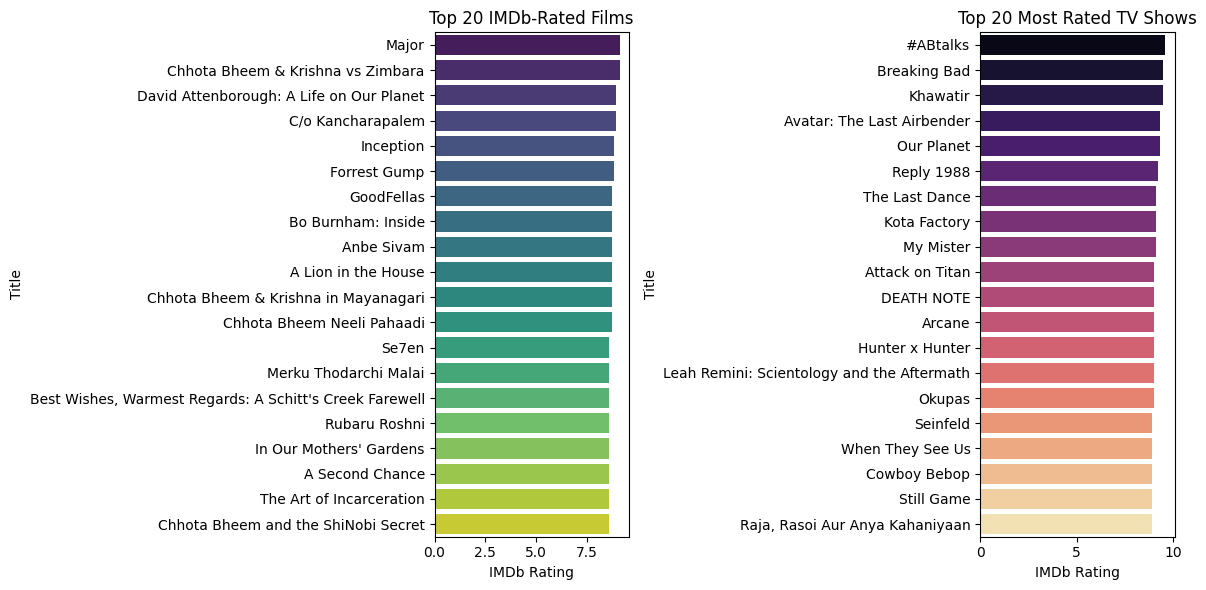

In [20]:
# Filter films and TV shows
films = titles[titles['type'] == 'MOVIE']
tv_shows = titles[titles['type'] == 'SHOW']
# print(films)
# Sort films by IMDb rating and IMDb votes
top_rated_films = films.sort_values(by=['imdb_score','imdb_votes'], ascending=[False,False]).head(20)

# Sort TV shows by IMDb rating and IMDb votes
top_rated_tv_shows = tv_shows.sort_values(by=['imdb_score','imdb_votes'], ascending=[False,False]).head(20)
# print(top_rated_tv_shows)
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 20 IMDb-rated films
plt.subplot(1, 2, 1)
sns.barplot(data=top_rated_films, x='imdb_score', y='title', palette='viridis')
plt.title('Top 20 IMDb-Rated Films')
plt.xlabel('IMDb Rating')
plt.ylabel('Title')

# Create a bar plot for the 20 most rated TV shows
plt.subplot(1, 2, 2)
sns.barplot(data=top_rated_tv_shows, x='imdb_score', y='title', palette='magma')
plt.title('Top 20 Most Rated TV Shows')
plt.xlabel('IMDb Rating')
plt.ylabel('Title')

# Adjust the layout
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Find the minimum and maximum release years
min_release_year = titles['release_year'].min()
max_release_year = titles['release_year'].max()

# Create a list of decades within the range
decades = list(range(min_release_year - min_release_year % 10, max_release_year + 10, 10))

# Create a function to filter and select the top 5 TV shows/movies for each decade
def top_5_by_decade(decade):
    decade_titles = titles[(titles['release_year'] >= decade) & (titles['release_year'] < decade + 10)]
    return decade_titles.nlargest(5, 'imdb_score')

# Create an empty DataFrame to store the results
top_by_decade = pd.DataFrame(columns=titles.columns)

# Iterate through each decade, filter, and concatenate the top 5 to the result DataFrame
for decade in decades:
    top_by_decade = pd.concat([top_by_decade, top_5_by_decade(decade)], ignore_index=True)


### Top 5 tv-shows/movies in each decade based on imdb rating

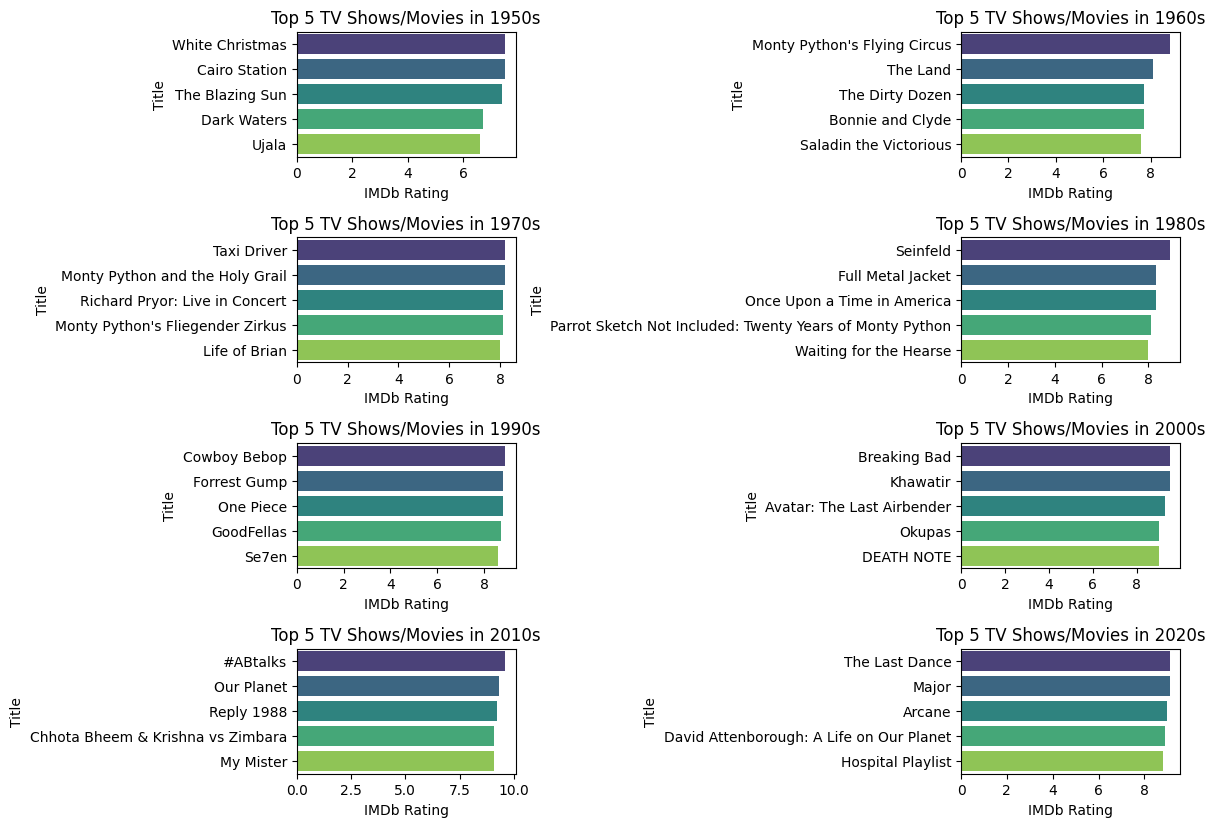

In [22]:
plt.figure(figsize=(12, 10))

# Create a bar plot for each decade
for i, decade in enumerate(decades):
    subset = top_by_decade[(top_by_decade['release_year'] >= decade) & (top_by_decade['release_year'] < decade + 10)]
    if(subset.size<75):
        continue
    plt.subplot(5, 2, i)
    sns.barplot(data=subset, x='imdb_score', y='title', palette='viridis')
    plt.title(f'Top 5 TV Shows/Movies in {decade}s')
    plt.xlabel('IMDb Rating')
    plt.ylabel('Title')

plt.tight_layout()
plt.show()

### Top 20 genres in the dataset

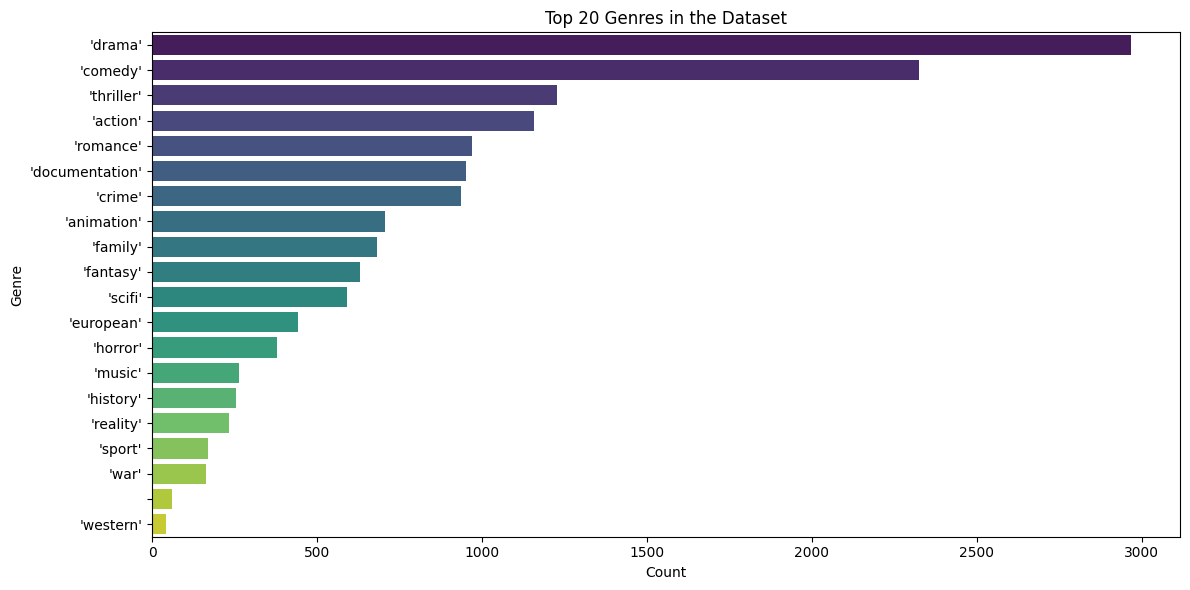

In [23]:
genre_counts = titles['genres'].str.strip('[]').str.split(', ').explode()

# Count the occurrence of each genre
top_genres = genre_counts.value_counts().head(20)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 20 genres
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 20 Genres in the Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')

# Adjust the layout
plt.tight_layout()
plt.show()